<a href="https://colab.research.google.com/github/poojan007/ICT606-Tutorials/blob/main/Week-10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras

In [5]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.layers import Dense, Activation, LSTM
from keras.models import Sequential


In [6]:
np.random.seed(1)

In [7]:
data = pd.read_csv('international-airline-passengers.csv', usecols=[1])
data = data.dropna() # Drop all Nans
data = data.values

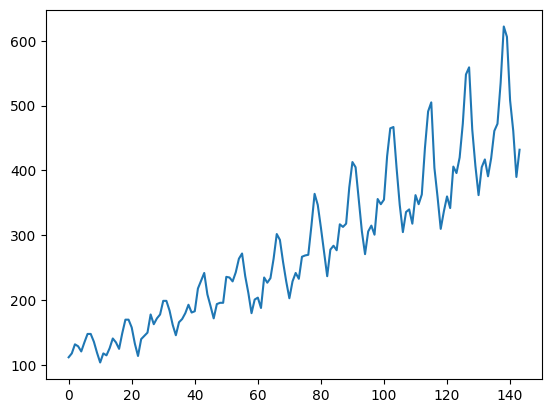

In [8]:
plt.figure()
plt.plot(data)

In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

In [17]:
time_window = 12
Xall, Yall = [], []

for i in range(time_window, len(data)):
 Xall.append(data[i-time_window:i, 0])
 Yall.append(data[i, 0])

Xall = np.array(Xall) # Convert them from list to array
Yall = np.array(Yall)

train_size = int(len(Xall) * 0.8)
test_size = len(Xall) - train_size

Xtrain = Xall[:train_size, :]
Ytrain = Yall[:train_size]

Xtest = Xall[-test_size:, :]
Ytest = Yall[-test_size:]

In [11]:
model = Sequential()
model.add(Dense(20, input_dim=time_window, activation='relu'))
model.add(Dense(1))

In [12]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [13]:
model.fit(Xtrain, Ytrain, epochs=100, batch_size=2, verbose=2, validation_split=0.05)

Epoch 1/100
50/50 - 3s - loss: 0.0085 - val_loss: 0.0278 - 3s/epoch - 70ms/step
Epoch 2/100
50/50 - 0s - loss: 0.0050 - val_loss: 0.0230 - 236ms/epoch - 5ms/step
Epoch 3/100
50/50 - 0s - loss: 0.0046 - val_loss: 0.0181 - 265ms/epoch - 5ms/step
Epoch 4/100
50/50 - 0s - loss: 0.0039 - val_loss: 0.0198 - 162ms/epoch - 3ms/step
Epoch 5/100
50/50 - 0s - loss: 0.0039 - val_loss: 0.0166 - 127ms/epoch - 3ms/step
Epoch 6/100
50/50 - 0s - loss: 0.0033 - val_loss: 0.0135 - 126ms/epoch - 3ms/step
Epoch 7/100
50/50 - 0s - loss: 0.0034 - val_loss: 0.0117 - 121ms/epoch - 2ms/step
Epoch 8/100
50/50 - 0s - loss: 0.0025 - val_loss: 0.0190 - 128ms/epoch - 3ms/step
Epoch 9/100
50/50 - 0s - loss: 0.0026 - val_loss: 0.0125 - 126ms/epoch - 3ms/step
Epoch 10/100
50/50 - 0s - loss: 0.0023 - val_loss: 0.0105 - 150ms/epoch - 3ms/step
Epoch 11/100
50/50 - 0s - loss: 0.0025 - val_loss: 0.0098 - 109ms/epoch - 2ms/step
Epoch 12/100
50/50 - 0s - loss: 0.0019 - val_loss: 0.0076 - 119ms/epoch - 2ms/step
Epoch 13/100
50

5/5 [==============================] - 0s 6ms/step
Training Data RMSE: 0.02


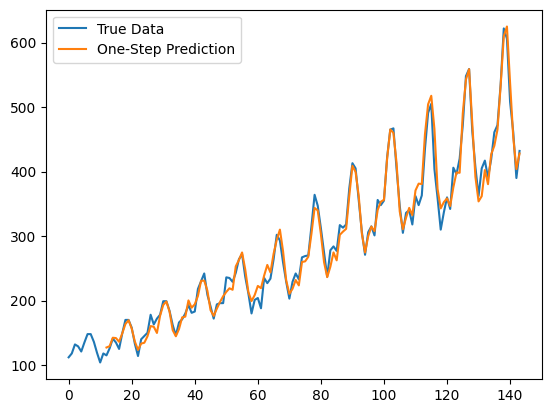

In [14]:
allPredict = model.predict(Xall)
allPredictPlot = scaler.inverse_transform(allPredict)

plt.figure()
plt.plot(scaler.inverse_transform(data), label='True Data')
plt.plot(np.arange(time_window,
len(data)),allPredictPlot, label='One-Step Prediction')
plt.legend()

trainScore = math.sqrt(mean_squared_error(Ytrain, allPredict[:train_size,0]))
print('Training Data RMSE: {0:.2f}'.format(trainScore))

In [21]:
time_window = 12

In [22]:
Xtrain=np.reshape(Xtrain, (Xtrain.shape[0], time_window, 1))
Xtest=np.reshape(Xtest, (Xtest.shape[0], time_window, 1))

In [28]:
model = Sequential()
# Add a LSTM with units (number of hidden neurons) = 50
# input_dim = 1 (for time series)
# return sequences = False means only forward the last lagged output to the following layer

model.add(LSTM(
 input_shape=(None, 1),
 units=50,
 return_sequences=False)) # Many-to-One model

model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss="mse", optimizer="adam")

5/5 [==============================] - 1s 7ms/step


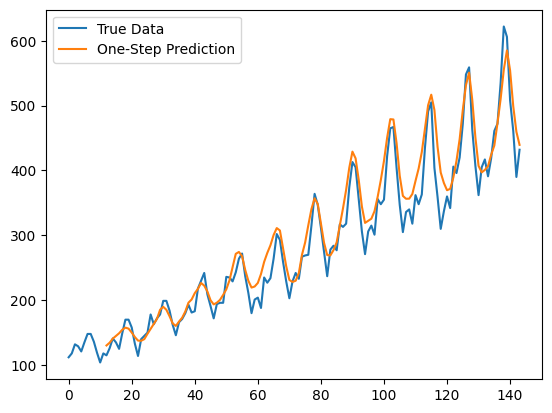

Training Data RMSE: 290.20


In [32]:
allPredict = model.predict(np.reshape(Xall, (len(Xall[:,1]),time_window,1)))
allPredict = scaler.inverse_transform(allPredict)

allPredictPlot = np.empty_like(data)
allPredictPlot[:, :] = np.nan
allPredictPlot[time_window:, :] = allPredict

plt.figure()
plt.plot(scaler.inverse_transform(data), label='True Data')
plt.plot(allPredictPlot, label='One-Step Prediction')
plt.legend()
plt.show()

trainScore = math.sqrt(mean_squared_error(Ytrain, allPredict[:train_size,0]))
print('Training Data RMSE: {0:.2f}'.format(trainScore))

In [30]:
model.fit(Xtrain, Ytrain, batch_size=5, epochs = 100, validation_split=0.05)

Epoch 1/100
20/20 [==============================] - 4s 35ms/step - loss: 0.0468 - val_loss: 0.0229
Epoch 2/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0095 - val_loss: 0.0453
Epoch 3/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0075 - val_loss: 0.0315
Epoch 4/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0066 - val_loss: 0.0222
Epoch 5/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0066 - val_loss: 0.0306
Epoch 6/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0061 - val_loss: 0.0230
Epoch 7/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0060 - val_loss: 0.0164
Epoch 8/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0067 - val_loss: 0.0165
Epoch 9/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0065 - val_loss: 0.0197
Epoch 10/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0060 - val_loss: 0.0232
Epoch 

1/1 [==============================] - 0s 22ms/step


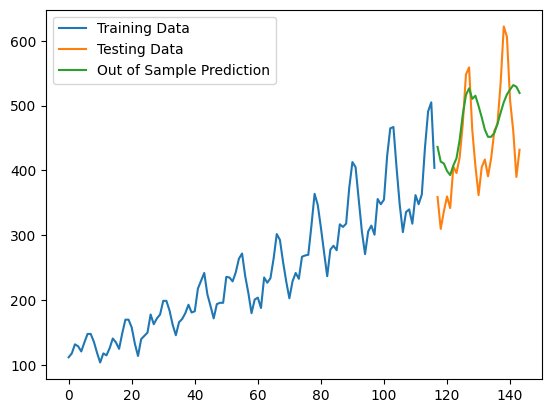

Dynamic Forecast RMSE: 474.60


In [33]:
dynamic_prediction = np.copy(data[:len(data) -test_size])
for i in range(len(data) - test_size, len(data)):
 last_feature = np.reshape(dynamic_prediction[i-time_window:i], (1,time_window,1))
 next_pred = model.predict(last_feature)
 dynamic_prediction = np.append(dynamic_prediction, next_pred)
dynamic_prediction = dynamic_prediction.reshape(-1,1)
dynamic_prediction = scaler.inverse_transform(dynamic_prediction)

plt.figure()
plt.plot(scaler.inverse_transform(data[:len(data) -
test_size]), label='Training Data')
plt.plot(np.arange(len(data) - test_size, len(data), 1),
scaler.inverse_transform(data[-test_size:]),
label='Testing Data')
plt.plot(np.arange(len(data) - test_size, len(data), 1),
dynamic_prediction[-test_size:], label='Out of Sample Prediction')
plt.legend(loc = "upper left")
plt.show()
testScore = math.sqrt(mean_squared_error(Ytest,
dynamic_prediction[-test_size:]))
print('Dynamic Forecast RMSE: {0:.2f}'.format(testScore))